# Data Scientist Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

## Georgios Pallas

### ==========================================================
## *Further experimentation with different models and tuning*
### *The main file for the project is the finding_donors.ipynb*
### ==========================================================

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set()

%matplotlib inline

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [3]:
data.shape

(45222, 14)

In [4]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


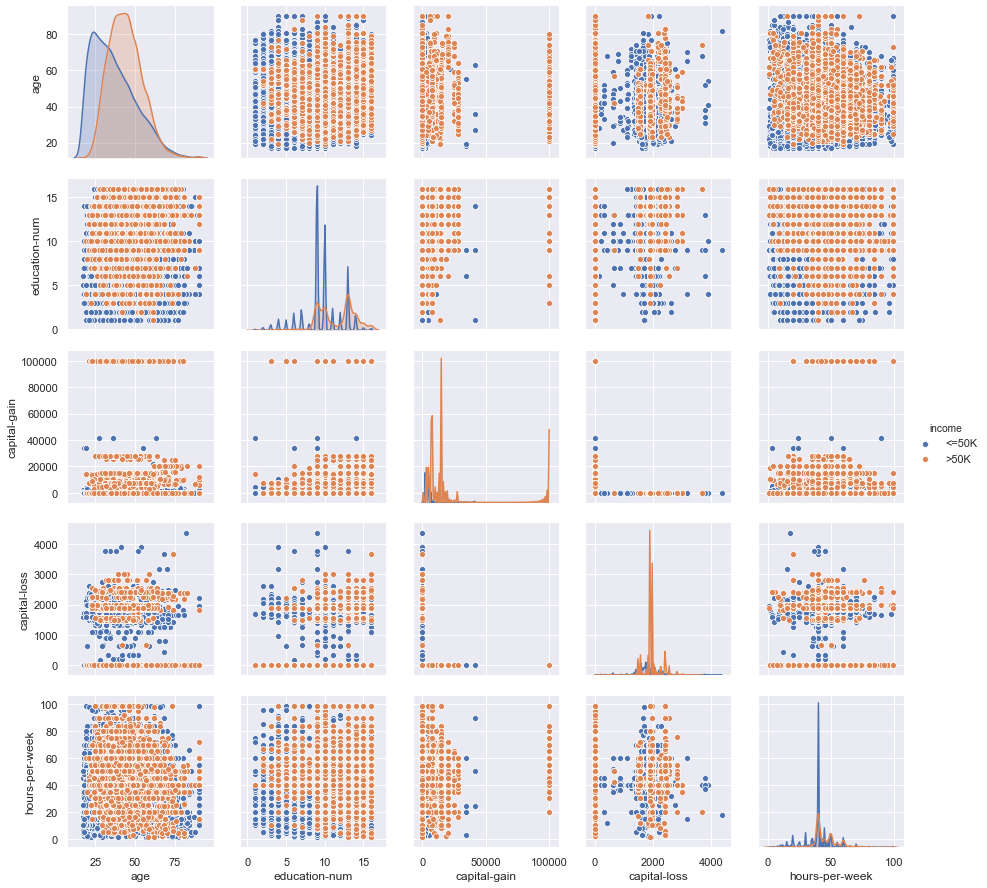

In [10]:
sns.pairplot(data=data, hue='income');

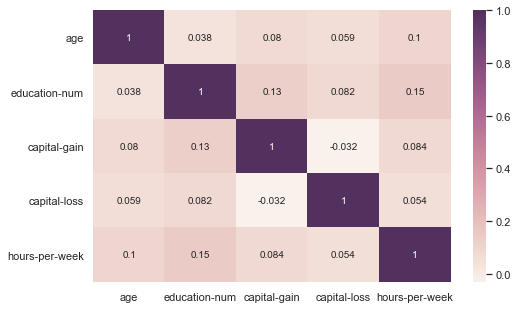

In [38]:
plt.figure(figsize=(8,5))
cmap = sns.cubehelix_palette(as_cmap=True, reverse=False, dark = 0.25, light = 0.95, hue = 0.8)
sns.heatmap(data=data.corr(), annot=True, cmap=cmap);

In [5]:
#explore data type and unique intries for outcome
type(data.income[0]), data.income.unique()

(str, array(['<=50K', '>50K'], dtype=object))

In [7]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data.income == '>50K'])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data.income == '<=50K'])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k/n_records*100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(round(greater_percent, 2)))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

C:\Users\georg\Google Drive\2. Reflections\DATA SCIENCE\UDACITY - Machine Learning Nanodegree\Project_1\visuals.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


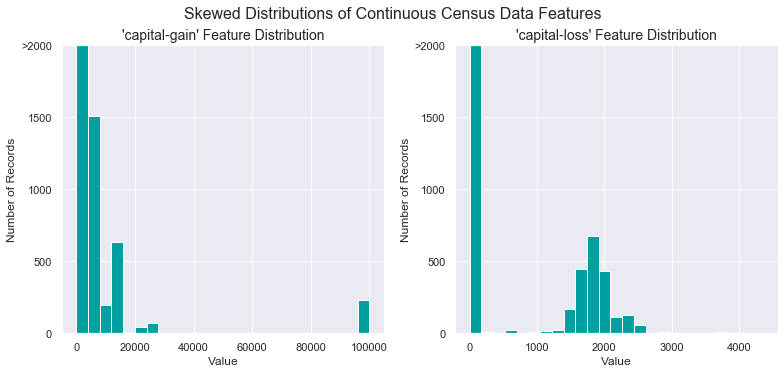

In [2]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

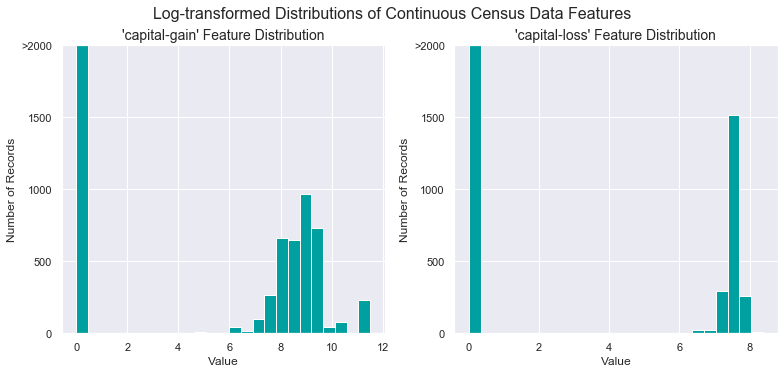

In [3]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [4]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [5]:
features_log_minmax_transform.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


In [6]:
income_raw.unique()

array(['<=50K', '>50K'], dtype=object)

In [7]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.replace({'<=50K': 0, '>50K': 1})

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
#print(encoded)

103 total features after one-hot encoding.


In [8]:
# We see that our income values are not distributed equally. There are much more individuals with income <=50K
income.value_counts()

0    34014
1    11208
Name: income, dtype: int64

In [9]:
features_final.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [10]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [11]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# TODO: Calculate accuracy, precision and recall
accuracy = income.sum()/len(income)
recall = 1
precision = accuracy

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1+0.5**2)*((precision*recall)/(0.5**2*precision+recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


### Question 2 - Model Application

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [12]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import accuracy_score, fbeta_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end-start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

In [13]:
def evaluate(results, accuracy, f1):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = plt.subplots(2, 3, figsize = (11,6.8))
    plt.subplots_adjust(wspace=0.3, hspace=0.28, top=0.98)

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.5), loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'large')   
    #plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 14, y = 1.10)
    #plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.
RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.


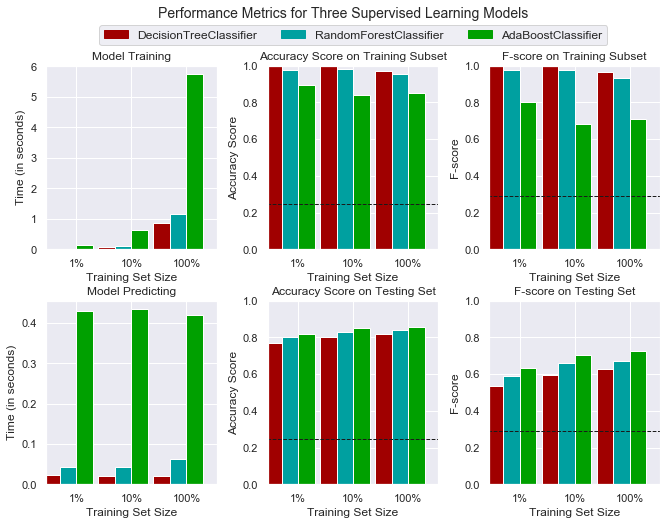

In [14]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# TODO: Initialize the three models
clf_A = DecisionTreeClassifier(random_state=0)
clf_B = RandomForestClassifier(n_estimators=10, random_state=0)
clf_C = AdaBoostClassifier(random_state=0)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(0.1*len(y_train))
samples_1 = int(0.01*len(y_train))

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
evaluate(results, accuracy, fscore)

Comparing different classifiers - Gradient Boosting, XGBoost - with AdaBoost.

AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.
GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.
XGBClassifier trained on 361 samples.
XGBClassifier trained on 3617 samples.
XGBClassifier trained on 36177 samples.


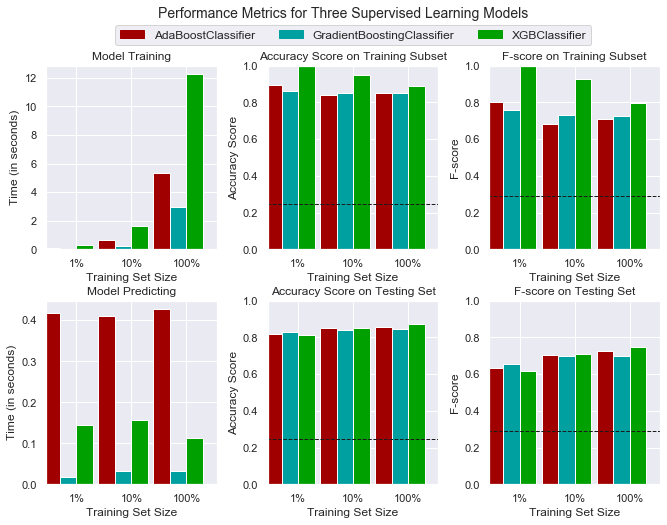

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

# Initialize the three models
clf_A = AdaBoostClassifier(random_state=0)
clf_B = GradientBoostingClassifier(n_estimators=10, random_state=0)
clf_C = xgb.XGBClassifier(random_state=0)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = int(0.1*len(y_train))
samples_1 = int(0.01*len(y_train))

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer: ** 

**AdaBoost** comes from Adaptive Boosting. It is an ensemble algorithm and belongs to the Boosting methods of ensembles. AdaBoost combines the predictions of several weak learners (base estimators), usually decision trees, and produces a power ensemble (a strong learner). That is done sequentially in Boosting algorithms. Base estimators (weak learners) are built sequentially and one tries to reduce the bias of the combined estimator.

Thus, to understand how AdaBoost works we first need to explain the notions of: **_weak learners, decision trees and boosting._**

**What is a weak learner?** A weak learner is an algorithm that performs slightly better than a random guess in predicting a target variable. Random guessing has a probability of 50%; like flipping a coin and guessing if it is head or tail. A weaker learner can do sligthly better than that. The most popular weak learner used in a boosting method like AdaBoost is a decision tree with one split (decision stump).

**What is a decision tree?** It is a decision model represented in a tree structure. We can thing of it as a model that asks a lot of questions about the data until it narrows down the information well enough to make a prediction. The branches of the tree represent a question-like observation of the features of the dataset related to the target variable. And the leaves of the tree represent the target variable. For example, based in our dataset, the decision tree can have a node that represents the age of a person; the branches can represent people under 30 years or above 30 years old; the leaves will represent the target value which is people earn more than 50,000 USD or less than 50,000 USD. It might be for instance that the decision tree predicts that people who are younger than 30 years old earn less than 50,000 USD a year and people older than 30 years old earn more than 50,000 USD.

A special type of a decision tree is a **_decision stump_**. That is a decision tree consisting of only one level; the node (observation) and the leaves (target value). A decision stump is a very simple non-linear model, it is fast to train and it can make a prediction based only on one feature of the dataset (e.g. age).

Decision stumps are usually used as weak learners in boosting algorithms to predict a target value with sligthly better probability than random guessing.

**What is boosting?** Boosting is an ensemble method that combines many weaker learners into an ensemble strong learner (i.e. a model with high prediction power). We can think of boosting as follows: we can assume a quiz game that asks questions regarding a variety of topics like science, sports, history, music etc. If there is a single person to answer all these topics, his/her performance would probably not be that good. However, if we have people with different strenghts, e.g. one scientist that can answer science questions, one music fun that can answer the music related questions, etc then the performance of all these people will most likely be better than a single person. We can think of the people with different strengs as the weak learners and the combination of all these people together in one team as the strong learner. That essentially is boosting. An ensemble of weak learner models producing a strong learner model that has a good performance and can correctly predict the target value by taking into account all the different features of the dataset.

**As a boosting algorith we will use AdaBoost:**

The basic idea of AdaBoost is that it weights both the misclassified points and the models (weak learners). That basically means that data points get a score. Misclassified points get a higher score than correctly classified points. In addition, the weak learner also gets a score of how well it performed (i.e. how many points corretly classified versus incorrectly classified). That is done sequentially for each weak learner. The default weak learner is a decision stamp, as already explained. In the first iteration, the weak learner splits the data with the highest accuracy possible. The misclassified data points get punished more than the rest of the points. In the second itteration, a weak learner again tries to split the newly weighted points resulted from the 1st iteration to achieve the highest possible accuracy. Again the misclassified points are punished more and so on. In that way, the classifiers focus on data points that are difficult to corectly classify. In addition, on each step the models (weak learners) are weighted on how well they are doing. The iterations continue until a low training error is achieved or until a pre-defined number of weak learners is achieved. At the end, the weighted models (weak learners) are combined to create a strong learner.

**For the case of the CharityML dataset, AdaBoost will thus do the following steps:**

The first weak learner (in this case a decision stump) will be fit to the training data (with all the samples equally weighted, using the features from our dataset like age, education level, marital status, etc) and will create the decision boundary that predicts the individuals that earn more than 50,000 USD, with the highest possible accuracy (minimizing the misclassified points). For example, it might be than people older than 30 years old earn more than 50K USD, and less than 30 years old earn less than 50K USD. The testing data will be used to measure the accuracy of that model. Any misclassified points (that is people younger than 30 years old that earn more than 50K, and people older than 30 years old that earn less than 50K) will then be weighted more. The model will also be weighted based on how accuratelly predicted the testing data.

After that, a second weak learner will be fitted to the new weighted data that resulted from the first weak learner. The model will again try to predict with the highest possible accuracy. For instance, it might again pick age as a feature to make a prediction, or it might pick another feature e.g. occupation, since now that data have a different weight. The goal of the weak learner is to achieve the highest possible accuracy. The misclassified points will be weighted more and the model (second weak learner) will also be weighted on how well it did on predicting accurately people that earn more than 50,000 USD.

This process will continue until a pre-defined number of weak learners has been used or until the prediction cannot been further improved. Then the weighted weak learners will be combined to produce an ensemble. Then this ensemble will be used to predict the individuals with income higher than 50,000 USD (possible donors).

#### *Sources:*
- ML Nanodegree Lessons
- https://towardsdatascience.com/adaboost-for-dummies-breaking-down-the-math-and-its-equations-into-simple-terms-87f439757dcf
- https://towardsdatascience.com/understanding-adaboost-2f94f22d5bfe
- https://stats.stackexchange.com/questions/124628/why-adaboost-with-decision-trees
- https://en.wikipedia.org/wiki/Decision_stump
- https://en.wikipedia.org/wiki/Boosting_(machine_learning)

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

## Experiment with decision tree classifier parameters...

In [16]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [17]:
# Initialize the classifier
clf = DecisionTreeClassifier(random_state=0)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {
              'max_depth': np.arange(7,12),
              'splitter': ['best'], #, 'random'
              'min_samples_split': np.arange(4, 10),
              'min_samples_leaf': np.arange(1, 6)
             }

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized model and the optimized model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nBest estimator is:\n------")
print(best_clf)

C:\Users\georg\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Unoptimized model
------
Accuracy score on testing data: 0.8182
F-score on testing data: 0.6273

Optimized Model
------
Final accuracy score on the testing data: 0.8530
Final F-score on the testing data: 0.7235

Best estimator is:
------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')


In [21]:
# Initialize the classifier
clf = DecisionTreeClassifier(random_state=0)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {
              'max_depth': np.arange(6,12),
              'splitter': ['best'], #, 'random'
              'min_samples_split': [100, 150, 200, 250, 300],
              'min_samples_leaf': [15, 20, 25, 30, 35, 40]
             }

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized model and the optimized model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nBest estimator is:\n------")
print(best_clf)

C:\Users\georg\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Unoptimized model
------
Accuracy score on testing data: 0.8182
F-score on testing data: 0.6273

Optimized Model
------
Final accuracy score on the testing data: 0.8544
Final F-score on the testing data: 0.7207

Best estimator is:
------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')


In [22]:
# Initialize the classifier
clf = DecisionTreeClassifier(random_state=0)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {
              'max_depth': np.arange(7,11),              
              'min_samples_split': [50, 75, 100, 125, 150],
              'min_samples_leaf': [15, 20, 25, 30]
             }

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized model and the optimized model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nBest estimator is:\n------")
print(best_clf)

C:\Users\georg\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Unoptimized model
------
Accuracy score on testing data: 0.8182
F-score on testing data: 0.6273

Optimized Model
------
Final accuracy score on the testing data: 0.8546
Final F-score on the testing data: 0.7217

Best estimator is:
------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=125,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')


## Experiment with AdaBoost Classifier parameters...

**An initial random tuning:**

In [18]:
# Initialize the classifier
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

start = time()

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_estimators': [500],
              'learning_rate': [0.01],
              'base_estimator__max_depth': [8],
              'base_estimator__min_samples_split': [8],
              'base_estimator__min_samples_leaf': [3]
             }

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized model and the optimized model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

end = time()

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nBest estimator is:\n------")
print(best_clf)
print("\nTime:\n------")
print(end-start)

C:\Users\georg\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Unoptimized model
------
Accuracy score on testing data: 0.8353
F-score on testing data: 0.6642

Optimized Model
------
Final accuracy score on the testing data: 0.8668
Final F-score on the testing data: 0.7439

Best estimator is:
------
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=8,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=3,
                                                         min_samples_split=8,
                          

### Tune the model parameters in steps
**For the parameter tuning for AdaBoost I will follow the guide for parameter tuning in Gradient Boosting from the following link:**

https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

### Model Tuning 1

**Tree-based parameters:**
- n_estimators: try between 20 and 80 estimators.
- min_samples_split: 0.5 to 1% of the data: I will pick 0.7% of my data, which is about 250.
- min_samples_leaf: I will select 40. This is used to prevent overfitting.
- max_depth: I will select 7.
- max_features: I leave it default by now. This is 'None'. I could try 'sqrt'.

**AdaBoost parameters:**
- learning_rate: 0.1

In [63]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

start = time()

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_estimators': range(20,81,10),
              'learning_rate': [0.1],
              'base_estimator__max_depth': [7],
              'base_estimator__min_samples_split': [250],
              'base_estimator__min_samples_leaf': [40]
             }

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer, cv=3)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized model and the optimized model
# Unoptimized model
#predictions_train_test = (clf.fit(X_train, y_train)).predict(X_train)
#predictions = (clf.fit(X_train, y_train)).predict(X_test)
# Optimized model
best_predictions_train_test = best_clf.predict(X_train)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
#print("Unoptimized model\n------")
#print("Accuracy score on training data: {:.4f}".format(accuracy_score(y_train, predictions_train_test)))
#print("F-score on training data: {:.4f}".format(fbeta_score(y_train, predictions_train_test, beta = 0.5)))
#print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
#print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Accuracy score on training data: {:.4f}".format(accuracy_score(y_train, best_predictions_train_test)))
print("F-score on training data: {:.4f}".format(fbeta_score(y_train, best_predictions_train_test, beta = 0.5)))
print("Accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nBest estimator:\n------")
print(best_clf)
print("\nBest score:\n------")
print(grid_fit.best_score_)
print("\nTime in minutes:\n------")
end = time()
print((end-start)/60)


Optimized Model
------
Accuracy score on training data: 0.8769
F-score on training data: 0.7749
Accuracy score on the testing data: 0.8692
F-score on the testing data: 0.7520

Best estimator:
------
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=7,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=40,
                                                         min_samples_split=250,
                                                         min_

The number of estimators selected by the GridSearchCV is 50. I will keep that 50 for now; and all the rest of the parameters static. I want to try a different max features parameter. I will change it from None to sqrt.

In [69]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

start = time()

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_estimators': [50],
              'learning_rate': [0.1],
              'base_estimator__max_depth': [7],
              'base_estimator__min_samples_split': [250],
              'base_estimator__min_samples_leaf': [40],
              'base_estimator__max_features': ['sqrt']
             }

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer, cv=3)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the optimized model
best_predictions_train_test = best_clf.predict(X_train)
best_predictions = best_clf.predict(X_test)

# Report scores
print("\nOptimized Model\n------")
print("Accuracy score on training data: {:.4f}".format(accuracy_score(y_train, best_predictions_train_test)))
print("F-score on training data: {:.4f}".format(fbeta_score(y_train, best_predictions_train_test, beta = 0.5)))
print("Accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nBest estimator:\n------")
print(best_clf)
print("\nBest score:\n------")
print(grid_fit.best_score_)
print("\nTime in minutes:\n------")
end = time()
print((end-start)/60)


Optimized Model
------
Accuracy score on training data: 0.8644
F-score on training data: 0.7502
Accuracy score on the testing data: 0.8606
F-score on the testing data: 0.7337

Best estimator:
------
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=7,
                                                         max_features='sqrt',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=40,
                                                         min_samples_split=250,
                                                         mi

It looks like the score has dropped by changing the maximum number of features from None to sqrt. I will continue with None for now, i.e. the classifer uses all features from our training dataset.

Lastly, try a different algorithm.

In [17]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

start = time()

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_estimators': [50],
              'learning_rate': [0.1],
              'algorithm': ['SAMME'],
              'base_estimator__max_depth': [7],
              'base_estimator__min_samples_split': [250],
              'base_estimator__min_samples_leaf': [40],              
             }

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer, cv=3)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the optimized model
best_predictions_train_test = best_clf.predict(X_train)
best_predictions = best_clf.predict(X_test)

# Report scores
print("\nOptimized Model\n------")
print("Accuracy score on training data: {:.4f}".format(accuracy_score(y_train, best_predictions_train_test)))
print("F-score on training data: {:.4f}".format(fbeta_score(y_train, best_predictions_train_test, beta = 0.5)))
print("Accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nBest estimator:\n------")
print(best_clf)
print("\nBest score:\n------")
print(grid_fit.best_score_)
print("\nTime in minutes:\n------")
end = time()
print((end-start)/60)


Optimized Model
------
Accuracy score on training data: 0.8628
F-score on training data: 0.7462
Accuracy score on the testing data: 0.8603
F-score on the testing data: 0.7328

Best estimator:
------
AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=7,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=40,
                                                         min_samples_split=250,
                                                         min_we

I will continue the tuning with the default algorithm. Also I will stay with the default max features for now.

### Model Tuning 2

I will now tune:
- max_depth
- min_samples_split

Later:
- min_samples_leaf
- max_features

**Tree-based parameters:**
- n_estimators: 50
- min_samples_split: ***try from 100 to 900 in steps of 200***
- max_depth: ***try from 5 to 13 in steps of 2***

Later:
- min_samples_leaf: 40

**AdaBoost parameters:**
- learning_rate: 0.1

In [70]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

start = time()

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_estimators': [50],
              'learning_rate': [0.1],
              'base_estimator__max_depth': range(5, 13, 2),
              'base_estimator__min_samples_split': range(100, 900, 200)
              #'base_estimator__min_samples_leaf': [40]
             }

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer, cv=3)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the optimized model
best_predictions_train_test = best_clf.predict(X_train)
best_predictions = best_clf.predict(X_test)

# Report scores
print("\nOptimized Model\n------")
print("Accuracy score on training data: {:.4f}".format(accuracy_score(y_train, best_predictions_train_test)))
print("F-score on training data: {:.4f}".format(fbeta_score(y_train, best_predictions_train_test, beta = 0.5)))
print("Accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nBest estimator:\n------")
print(best_clf)
print("\nBest score:\n------")
print(grid_fit.best_score_)
print("\nTime in minutes:\n------")
end = time()
print((end-start)/60)


Optimized Model
------
Accuracy score on training data: 0.8783
F-score on training data: 0.7763
Accuracy score on the testing data: 0.8668
F-score on the testing data: 0.7449

Best estimator:
------
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=9,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=700,
                                                         min_w

### Model Tuning 3

We see that the max depth is 9. We also see that the min number of splits are in the upper limit from our selection. I will keep the max depth as it is and increase the min samples split. I will also tune the min samples leaf parameter.

I will now tune:
- min_samples_split
- min_samples_leaf

**Tree-based parameters:**
- n_estimators: 50
- min_samples_split: ***try from 700 to 1300 in steps of 200***
- max_depth: 9
- min_samples_leaf: ***try from 30 to 60 in steps of 10***

**AdaBoost parameters:**
- learning_rate: 0.1

In [75]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

start = time()

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_estimators': [50],
              'learning_rate': [0.1],
              'base_estimator__max_depth': [9],
              'base_estimator__min_samples_split': range(700, 1301, 200),
              'base_estimator__min_samples_leaf': range(30, 61, 10)
             }

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer, cv=3)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the optimized model
best_predictions_train_test = best_clf.predict(X_train)
best_predictions = best_clf.predict(X_test)

# Report scores
print("\nOptimized Model\n------")
print("Accuracy score on training data: {:.4f}".format(accuracy_score(y_train, best_predictions_train_test)))
print("F-score on training data: {:.4f}".format(fbeta_score(y_train, best_predictions_train_test, beta = 0.5)))
print("Accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nBest estimator:\n------")
print(best_clf)
print("\nBest score:\n------")
print(grid_fit.best_score_)
print("\nTime in minutes:\n------")
end = time()
print((end-start)/60)


Optimized Model
------
Accuracy score on training data: 0.8774
F-score on training data: 0.7756
Accuracy score on the testing data: 0.8689
F-score on the testing data: 0.7510

Best estimator:
------
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=9,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=30,
                                                         min_samples_split=700,
                                                         min_

### Model Tuning 4

It looks like the min samples leaf is at the lower limit. I will keep all the rest parameters the same and change the mean samples leaf.

**Tree-based parameters:**
- n_estimators: 50
- min_samples_split: 700
- max_depth: 9
- min_samples_leaf: ***try from 15 to 35 in steps of 10***

**AdaBoost parameters:**
- learning_rate: 0.1

In [76]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

start = time()

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_estimators': [50],
              'learning_rate': [0.1],
              'base_estimator__max_depth': [9],
              'base_estimator__min_samples_split': [700],
              'base_estimator__min_samples_leaf': range(15, 36, 10)
             }

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer, cv=3)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the optimized model
#best_predictions_train_test = best_clf.predict(X_train)
#best_predictions = best_clf.predict(X_test)

# Report scores
#print("\nOptimized Model\n------")
#print("Accuracy score on training data: {:.4f}".format(accuracy_score(y_train, best_predictions_train_test)))
#print("F-score on training data: {:.4f}".format(fbeta_score(y_train, best_predictions_train_test, beta = 0.5)))
#print("Accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
#print("F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nBest estimator:\n------")
print(best_clf)
print("\nBest score:\n------")
print(grid_fit.best_score_)
print("\nTime in minutes:\n------")
end = time()
print((end-start)/60)


Best estimator:
------
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=9,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=35,
                                                         min_samples_split=700,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
  

### Model Tuning 5

It looks like the min samples leaf is now 35. I will keep it as it is. I will tune again now the min samples split.

**Tree-based parameters:**
- n_estimators: 50
- min_samples_split: ***try 650 to 750 in steps of 50***
- max_depth: 9
- min_samples_leaf: 35

**AdaBoost parameters:**
- learning_rate: 0.1

In [77]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

start = time()

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_estimators': [50],
              'learning_rate': [0.1],
              'base_estimator__max_depth': [9],
              'base_estimator__min_samples_split': range(650, 751, 50),
              'base_estimator__min_samples_leaf': [35]
             }

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer, cv=3)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Report scores
print("\nBest estimator:\n------")
print(best_clf)
print("\nBest score:\n------")
print(grid_fit.best_score_)
print("\nTime in minutes:\n------")
end = time()
print((end-start)/60)


Best estimator:
------
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=9,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=35,
                                                         min_samples_split=700,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
  

In [79]:
X_train.shape

(36177, 103)

In [85]:
np.sqrt(103), 0.3*103, 0.4*103

(10.14889156509222, 30.9, 41.2)

### Model Tuning 6

It looks like the min samples split is 700 again. Time to tune the max number of features.
This should be around 30 to 40% of the total number of features.

**Tree-based parameters:**
- n_estimators: 50
- min_samples_split: 700
- max_depth: 9
- min_samples_leaf: 35
- max_features: ***try 35 to 50 by step 5***

**AdaBoost parameters:**
- learning_rate: 0.1

In [87]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

start = time()

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_estimators': [50],
              'learning_rate': [0.1],
              'base_estimator__max_depth': [9],
              'base_estimator__min_samples_split': [700],
              'base_estimator__min_samples_leaf': [35],
              'base_estimator__max_features': range(35, 56, 5)
             }

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer, cv=3)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Report scores
print("\nBest estimator:\n------")
print(best_clf)
print("\nBest score:\n------")
print(grid_fit.best_score_)
print("\nTime in minutes:\n------")
end = time()
print((end-start)/60)


Best estimator:
------
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=9,
                                                         max_features=40,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=35,
                                                         min_samples_split=700,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
    

The best score is slightly lower with when we had None max features.

### Model Tuning 7

Tune the learning rate. Decrease the learning rate by a number and increase the number of estimators proportionally.
I had 50 estimators and learning rate 0.1.

**Tree-based parameters:**
- n_estimators: **100**
- min_samples_split: 700
- max_depth: 9
- min_samples_leaf: 35
- max_features: 40

**AdaBoost parameters:**
- learning_rate: **0.05**

In [88]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

start = time()

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_estimators': [100],
              'learning_rate': [0.05],
              'base_estimator__max_depth': [9],
              'base_estimator__min_samples_split': [700],
              'base_estimator__min_samples_leaf': [35],
              'base_estimator__max_features': [40]
             }

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer, cv=3)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Report scores
print("\nBest estimator:\n------")
print(best_clf)
print("\nBest score:\n------")
print(grid_fit.best_score_)
print("\nTime in minutes:\n------")
end = time()
print((end-start)/60)


Best estimator:
------
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=9,
                                                         max_features=40,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=35,
                                                         min_samples_split=700,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
    

### Model Tuning 8

Decrease the learning rate further.

**Tree-based parameters:**
- n_estimators: **500**
- min_samples_split: 700
- max_depth: 9
- min_samples_leaf: 35
- max_features: 40

**AdaBoost parameters:**
- learning_rate: **0.01**

In [89]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

start = time()

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_estimators': [500],
              'learning_rate': [0.01],
              'base_estimator__max_depth': [9],
              'base_estimator__min_samples_split': [700],
              'base_estimator__min_samples_leaf': [35],
              'base_estimator__max_features': [40]
             }

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer, cv=3)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Report scores
print("\nBest estimator:\n------")
print(best_clf)
print("\nBest score:\n------")
print(grid_fit.best_score_)
print("\nTime in minutes:\n------")
end = time()
print((end-start)/60)


Best estimator:
------
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=9,
                                                         max_features=40,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=35,
                                                         min_samples_split=700,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
    

### Model Tuning 9

Try the same but with None max features.

**Tree-based parameters:**
- n_estimators: **500**
- min_samples_split: 700
- max_depth: 9
- min_samples_leaf: 35
- max_features: **None**

**AdaBoost parameters:**
- learning_rate: **0.01**

In [90]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

start = time()

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_estimators': [500],
              'learning_rate': [0.01],
              'base_estimator__max_depth': [9],
              'base_estimator__min_samples_split': [700],
              'base_estimator__min_samples_leaf': [35]
              #'base_estimator__max_features': [40]
             }

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer, cv=3)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Report scores
print("\nBest estimator:\n------")
print(best_clf)
print("\nBest score:\n------")
print(grid_fit.best_score_)
print("\nTime in minutes:\n------")
end = time()
print((end-start)/60)


Best estimator:
------
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=9,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=35,
                                                         min_samples_split=700,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
  

### Model Tuning 10

Decrease the learning rate further and increase more the number of estimators, instead of 1000, 1200.

**Tree-based parameters:**
- n_estimators: **1200**
- min_samples_split: 700
- max_depth: 9
- min_samples_leaf: 35
- max_features: 40

**AdaBoost parameters:**
- learning_rate: **0.005**

In [91]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

start = time()

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_estimators': [1200],
              'learning_rate': [0.005],
              'base_estimator__max_depth': [9],
              'base_estimator__min_samples_split': [700],
              'base_estimator__min_samples_leaf': [35],
              'base_estimator__max_features': [40]
             }

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer, cv=3)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Report scores
print("\nBest estimator:\n------")
print(best_clf)
print("\nBest score:\n------")
print(grid_fit.best_score_)
print("\nTime in minutes:\n------")
end = time()
print((end-start)/60)


Best estimator:
------
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=9,
                                                         max_features=40,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=35,
                                                         min_samples_split=700,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
    

### Model Tuning 11

Decrease the learning rate further and increase more the number of estimators, instead of 1000, 1200.

**Tree-based parameters:**
- n_estimators: **5000**
- min_samples_split: 700
- max_depth: 9
- min_samples_leaf: 35
- max_features: 40

**AdaBoost parameters:**
- learning_rate: **0.001**

In [93]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

start = time()

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_estimators': [5000],
              'learning_rate': [0.001],
              'base_estimator__max_depth': [9],
              'base_estimator__min_samples_split': [700],
              'base_estimator__min_samples_leaf': [35],
              'base_estimator__max_features': [40]
             }

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer, cv=3)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Report scores
print("\nBest estimator:\n------")
print(best_clf)
print("\nBest score:\n------")
print(grid_fit.best_score_)
print("\nTime in minutes:\n------")
end = time()
print((end-start)/60)


Best estimator:
------
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=9,
                                                         max_features=40,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=35,
                                                         min_samples_split=700,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
    

**Predictions for model tuning 11:**

In [95]:
# Make predictions using the optimized model
#best_predictions_train_test = best_clf.predict(X_train)
best_predictions = best_clf.predict(X_test)

# Report scores
print("\nOptimized Model\n------")
#print("Accuracy score on training data: {:.4f}".format(accuracy_score(y_train, best_predictions_train_test)))
#print("F-score on training data: {:.4f}".format(fbeta_score(y_train, best_predictions_train_test, beta = 0.5)))
print("Accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))


Optimized Model
------
Accuracy score on the testing data: 0.8670
F-score on the testing data: 0.7462


**Since in model tuning 10 the estimator had the best performance (best score), I will re-fit my model again with the parameters selected in model tuning 10 and make predictions on the test data:**

In [18]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

start = time()

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_estimators': [1200],
              'learning_rate': [0.005],
              'base_estimator__max_depth': [9],
              'base_estimator__min_samples_split': [700],
              'base_estimator__min_samples_leaf': [35],
              'base_estimator__max_features': [40]
             }

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer, cv=3)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the optimized model
#best_predictions_train_test = best_clf.predict(X_train)
best_predictions = best_clf.predict(X_test)

# Report scores
print("\nOptimized Model\n------")
#print("Accuracy score on training data: {:.4f}".format(accuracy_score(y_train, best_predictions_train_test)))
#print("F-score on training data: {:.4f}".format(fbeta_score(y_train, best_predictions_train_test, beta = 0.5)))
print("Accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nBest estimator:\n------")
print(best_clf)
print("\nBest score:\n------")
print(grid_fit.best_score_)
print("\nTime in minutes:\n------")
end = time()
print((end-start)/60)


Optimized Model
------
Accuracy score on the testing data: 0.8676
F-score on the testing data: 0.7467

Best estimator:
------
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=9,
                                                         max_features=40,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=35,
                                                         min_samples_split=700,
                                                         min_weight_fraction_leaf=0.0,
                                                 

**Results for the un-optimized model before the tuning:**

In [20]:
predictions = (clf.fit(X_train, y_train)).predict(X_test)
# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8353
F-score on testing data: 0.6642


### Discussion on the results of tuning

The highest score from an estimator I found it in *model tuning 10*. That is a **best score** of **0.759**.

The model predicts on the testing data an **accuracy score** of **0.8676** and an **F-score** of **0.7467**. That is the best performance I could achieve with the AdaBoost classifier.

I could further tune my model, e.g. by reducing the learning rate and increasing the number of estimators. However, lowering the learning rate and increasing the number of estimators requires a lot of resources resulting in high grid-searching times.

### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |      0.8353       |     0.8676      |
| F-score        |      0.6642       |     0.7467      |


----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

In [28]:
# the 13 different features of the original dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


**Answer:**

I believe the 5 most important features to predict if an individual's income is above 50,000 USD are the following:

1. Education-num
2. Occupation
3. Capitan gain
4. Capital loss
5. Age

Education-num is the number of education years a person had, which is probably high correlated to income.

Occupation is also a factor that is linked to different income levels.

Capital gain and capital loss are metrics related to some asset/investment gain or loss and can be correlated to different income levels.

Finally, age is also a factor that is linked to different income levels (for example a very young or old person have normally lower incomes than other ages).

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

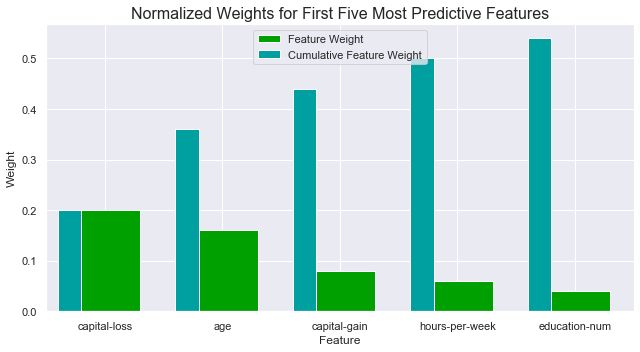

In [29]:
# TODO: Import a supervised learning model that has 'feature_importances_'

# The AdaBoost algorithm that I have used has feature_importance attribute available.

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier().fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**

I correctly picked 4 out of the 5 most important features in the previous question.

The features I assumed to be important were education num, capital loss, capital gain and age, although I ranked them differently. I assumed the most important feature was education num; it turns out that this is the 5th most important feature. The one with the highest predictive power is capital loss, followed by age, capital gain, hours per week and education num. The cumulative weight of these 5 features to predict the income level (in order to identify the possible donors) is about 0.6 of the total 13 features.

I did not assume hours-per-week to be among the most important features, but of course it makes sense that people working a specific amount of hours (probably many hours per week) will also have increased income.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [30]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8663
F-score on testing data: 0.7479

Final Model trained on reduced data
------
Accuracy on testing data: 0.8430
F-score on testing data: 0.7023


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

In [32]:
(0.8663-0.8430)/0.8663, (0.7479-0.7023)/0.7479

(0.026895994459194262, 0.060970718010429165)

**Answer:**

The model's performance, when we use only the 5 most important features to train it, is slightly worse compared to the model when it is trained with all the features.

Specifically, the accuracy of the feature-selected trained model is 0.8430. That is about 2.7% less compared to the 0.8663 accuracy of the full-featured trained model.

Moreover, the fbeta score of the feature-selected trained model is 0.7023. That is about 6% less compared to the 0.7479 fbeta score of the full-featured trained model.

If training time was an important factor, I would consider to train my model with the reduced dataset. In this project, the tuning of AdaBoost Classifier took an important amount of time to complete. We can imagine in datasets with millions of records the training and tuning of a model would be very expensive. Thus, feature selection might be a good solution to reduce the amount of training time, even though it might come at the expense of the performance metrics. Of course that would also depend on the specific project/question need to be solved. If the problem that one tries to solve is serious, for example in datasets related to the diagnosis of health issues, then feature selection might not be a good idea. But for other datasets with more flexibility, for example recommendation engines, feature selection might come handy. And finally, feature selection might also depend on the performance metric under consideration. We saw in this project that the difference in accuracy is much smaller than that of the fbeta score. Thus, the decision would also depend on the metric we are interested to improve.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.